In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.simplefilter('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv("Wholesale customers data.csv")

In [3]:
df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

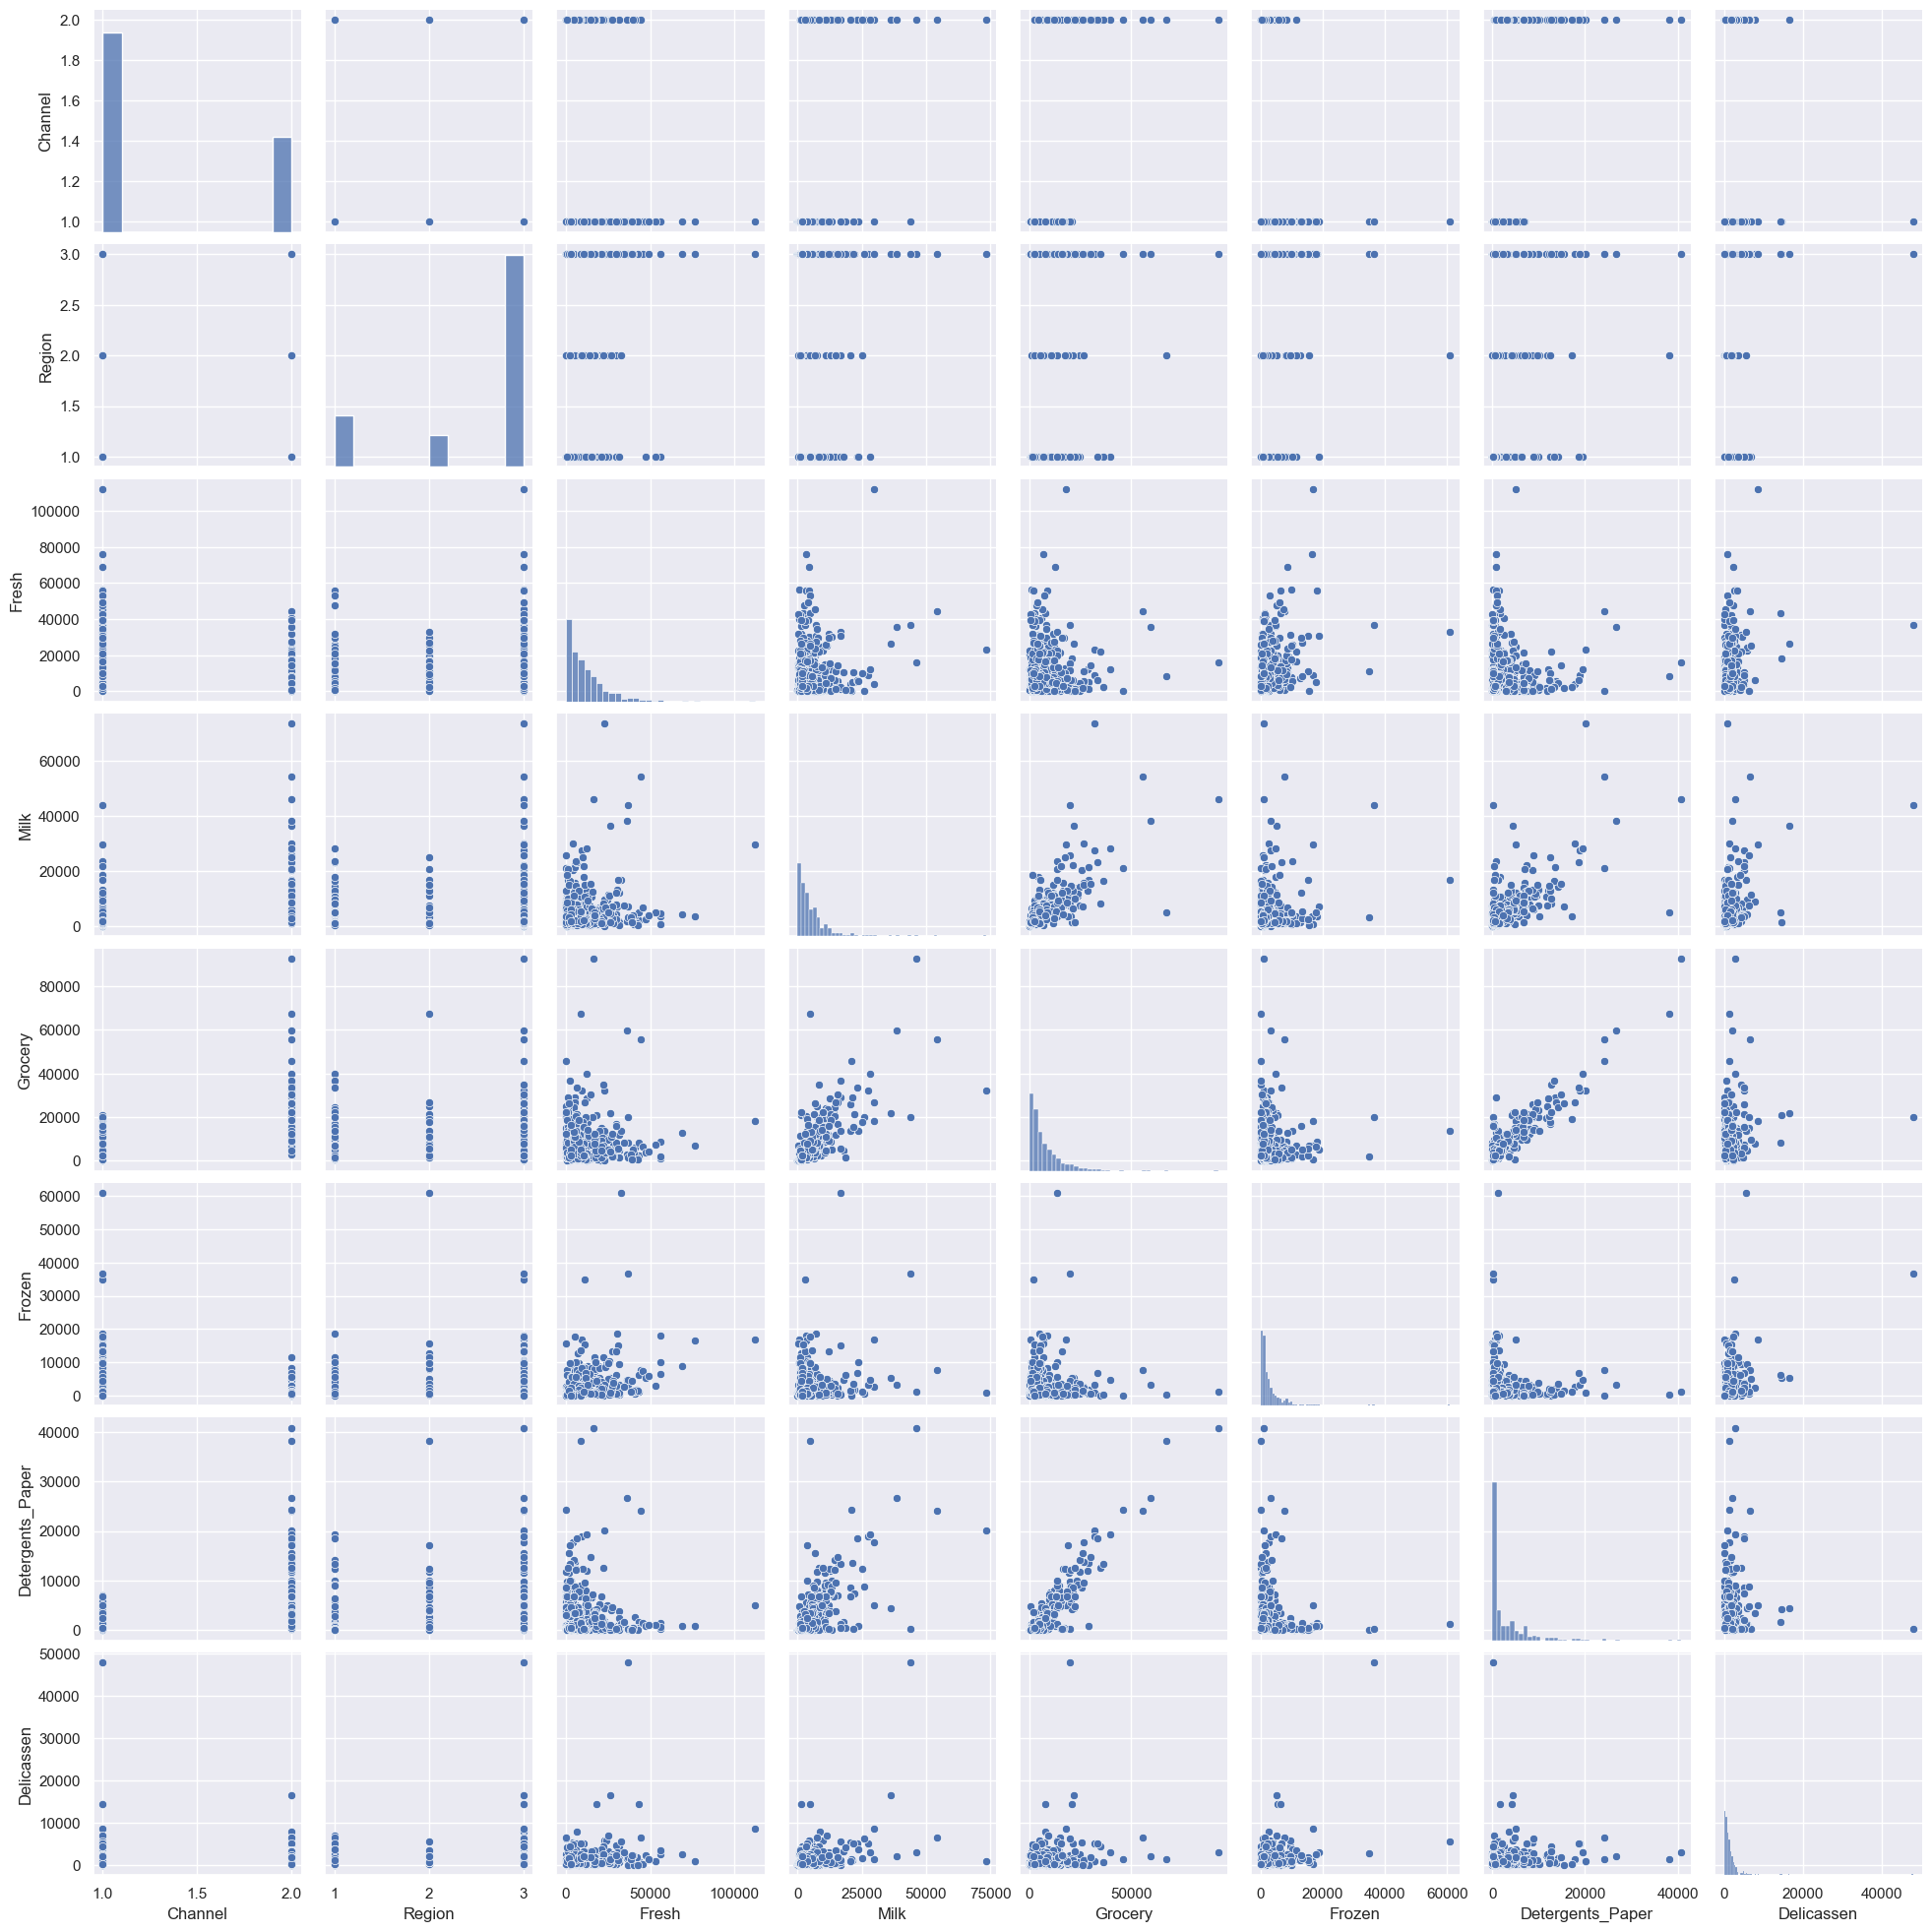

In [7]:
sns.pairplot(df)

In [23]:
df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,0


<Figure size 2250x1200 with 0 Axes>

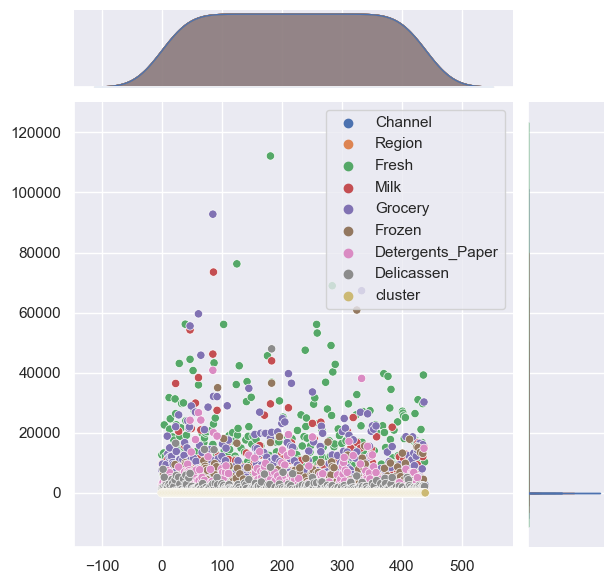

In [27]:
plt.figure(figsize=(15,8),dpi=150)
sns.jointplot(df)


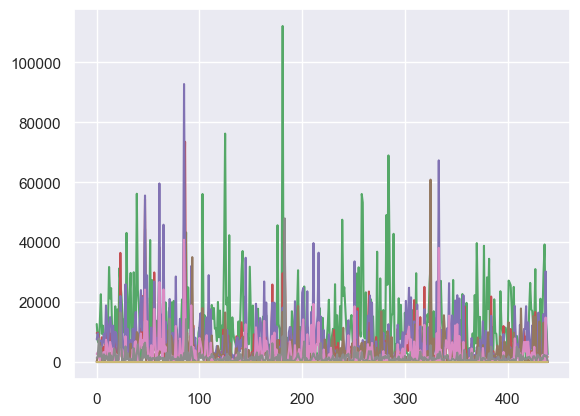

In [32]:
plt.plot(df)


In [34]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen', 'cluster'],
      dtype='object')

# Data Training to fit into the model

In [8]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


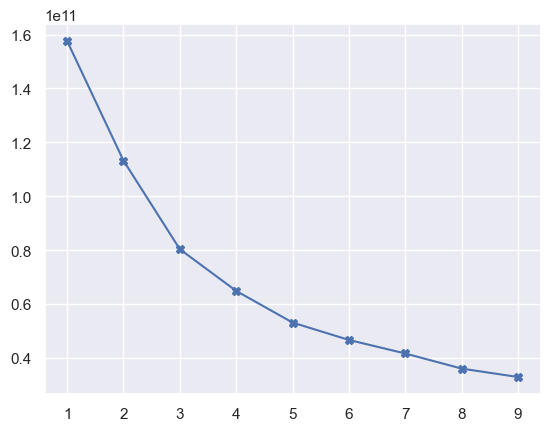

In [9]:
k_rng=range(1,10)
sse=[]
for i in k_rng:
    kmeans=KMeans(n_clusters=i,n_init=10)
    kmeans.fit(df)
    sse.append((i,kmeans.inertia_))
plt.plot([w[0] for w in sse],[w[1] for w in sse], marker="X")

In [10]:
# plt.xlabel('K-rnge')
# plt.ylabel('Sum of square error')
# plt.plot(k_rng,sse)

In [11]:
km=KMeans(n_clusters=5,n_init=10)

In [12]:
km.fit(df)

KMeans(n_clusters=5, n_init=10)

In [13]:
labels=km.predict(df)

In [14]:
labels

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 1, 0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 2, 2, 0, 1, 1, 4, 0, 0, 1, 1,
       2, 1, 1, 3, 2, 1, 2, 2, 0, 1, 0, 2, 1, 1, 2, 2, 2, 3, 2, 1, 2, 3,
       2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 1, 2, 0, 2, 3, 3, 4,
       2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 4, 2, 0, 1, 1, 2, 1,
       2, 1, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 4, 0, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2,
       2, 1, 1, 0, 2, 1, 2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       4, 2, 2, 2, 2, 4, 1, 4, 2, 2, 2, 2, 1, 1, 0, 2, 2, 1, 2, 0, 0, 2,
       2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 3, 2, 2, 1, 1, 1, 0, 1, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 4, 0, 0,
       0, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2, 0, 2, 0, 2, 2, 4, 4, 2, 2, 0, 2,
       1, 1, 1, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 4, 0, 4, 0,
       2, 0, 0, 0, 2, 2, 2, 1, 0, 2, 0, 2, 2, 2, 0,

In [15]:
C_center = kmeans.cluster_centers_
print(labels,"\n",C_center)

[2 2 2 2 0 2 2 2 2 1 1 2 0 0 0 2 1 2 0 2 0 2 0 1 0 0 2 2 1 0 0 2 0 0 2 2 0
 1 1 4 0 0 1 1 2 1 1 3 2 1 2 2 0 1 0 2 1 1 2 2 2 3 2 1 2 3 2 0 2 2 0 0 2 0
 2 0 2 1 2 2 2 1 2 0 2 3 3 4 2 0 2 2 1 2 1 2 2 2 2 2 1 1 2 4 2 0 1 1 2 1 2
 1 0 2 0 2 2 2 0 2 0 2 2 2 0 4 0 0 2 0 2 2 2 2 2 2 2 2 2 2 0 0 0 2 0 1 2 2
 2 0 0 2 0 2 2 1 1 0 2 1 2 2 0 1 2 1 2 2 2 2 1 1 2 1 2 1 4 2 2 2 2 4 1 4 2
 2 2 2 1 1 0 2 2 1 2 0 0 2 2 2 1 1 0 2 2 1 2 2 2 1 0 3 2 2 1 1 1 0 1 2 2 2
 2 2 2 2 0 2 2 2 2 2 0 2 0 2 2 0 2 4 0 0 0 2 2 1 2 2 0 2 2 1 2 0 2 0 2 2 4
 4 2 2 0 2 1 1 1 0 1 2 2 2 2 0 2 2 0 2 2 0 2 2 4 0 4 0 2 0 0 0 2 2 2 1 0 2
 0 2 2 2 0 1 2 1 1 1 1 0 2 1 2 0 1 2 2 1 2 2 2 1 2 2 0 2 0 4 2 2 0 2 2 1 0
 3 0 0 2 2 2 2 2 2 2 1 2 2 1 0 2 1 2 1 2 1 2 2 0 1 2 2 0 2 2 2 2 2 2 2 0 2
 0 0 2 0 2 2 1 0 2 2 0 0 0 2 1 2 2 0 2 2 2 2 2 0 2 2 1 2 2 2 2 0 0 0 0 2 0
 1 2 2 2 2 2 2 2 2 1 2 1 2 1 0 0 0 0 2 1 0 2 2 1 2 0 2 0 0 0 1 2 2] 
 [[1.85057471e+00 2.52873563e+00 4.41754023e+03 9.21802299e+03
  1.45187816e+04 1.46213793e+03 6.32300000e

In [16]:
# dfGroup = pd.concat([df,pd.DataFrame(labels, columns= ['Group'])], axis=1, join='inner')
# dfGroup.head()

In [18]:
df['cluster']=labels

In [19]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,0


<AxesSubplot:xlabel='cluster'>

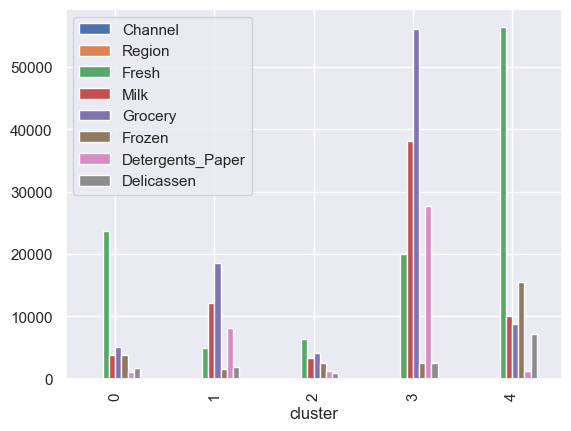

In [20]:
df.groupby("cluster").aggregate("mean").plot.bar()

<Figure size 2000x3000 with 0 Axes>

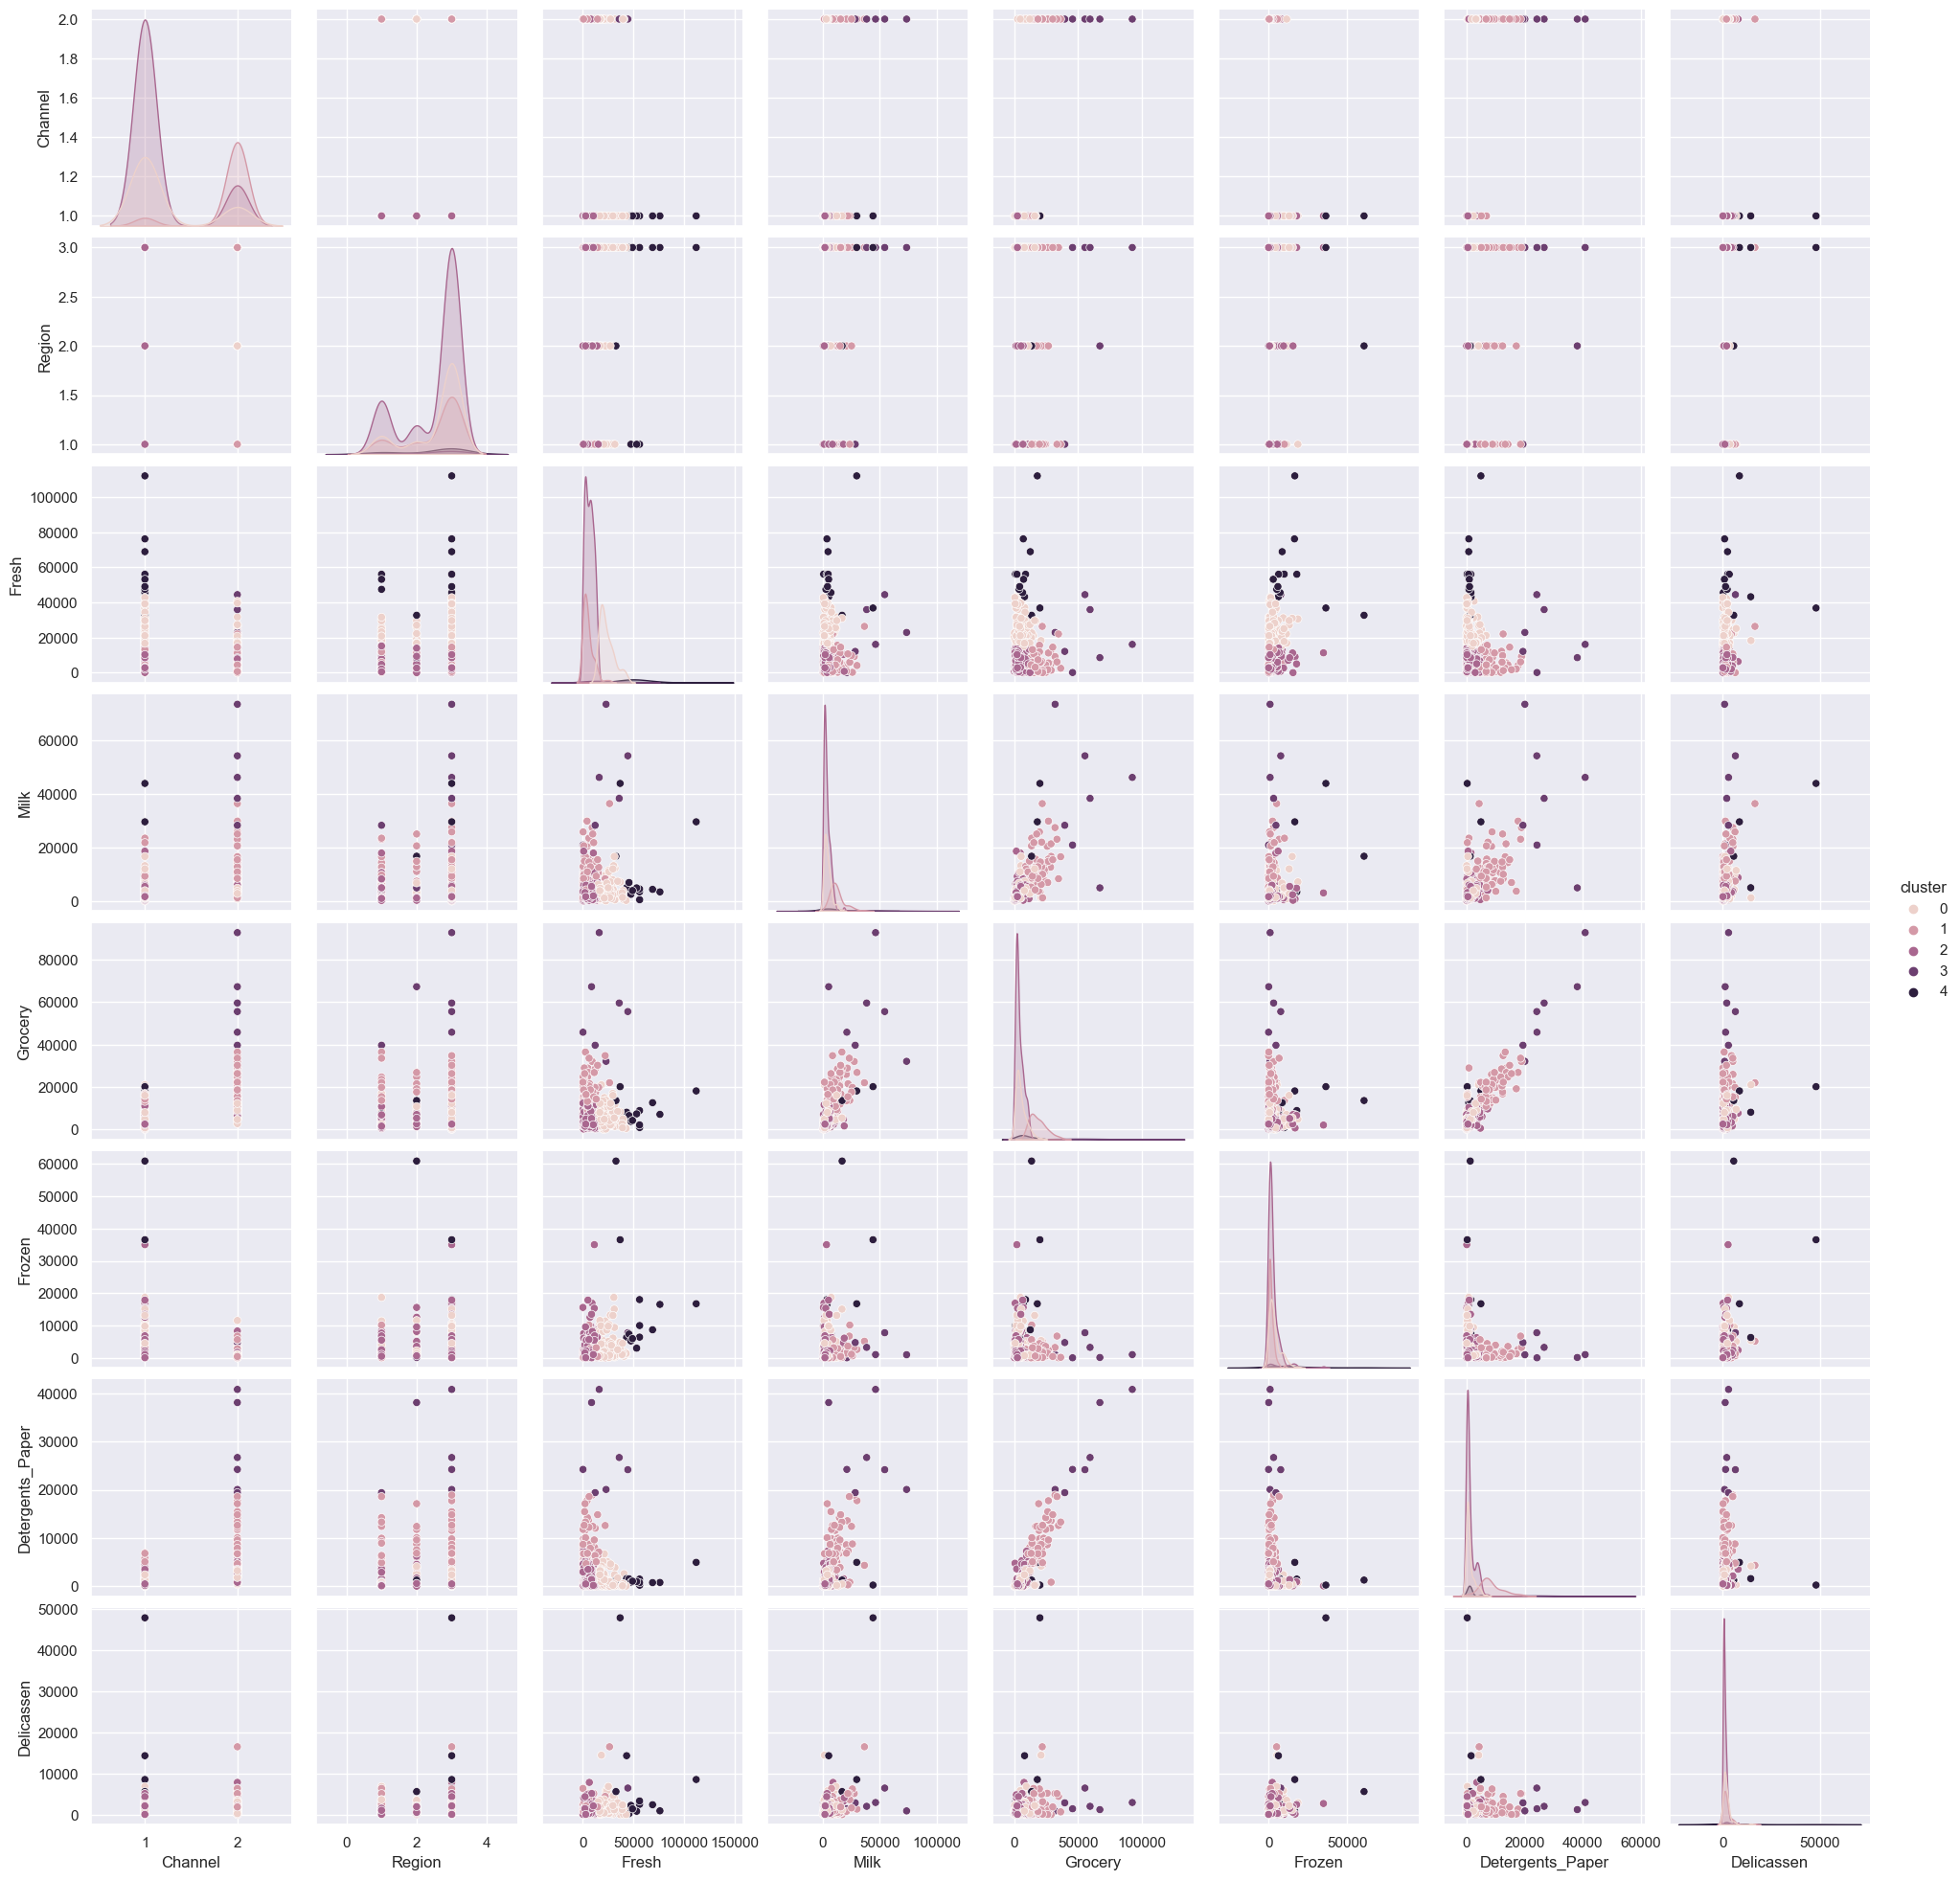

In [22]:
plt.figure(figsize=(20,30))
sns.pairplot(data=df, hue='cluster')